# HR Analytics Project- Understanding the Attrition in HR


Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [537]:
#importingLibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [538]:
#loadingData
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [539]:
#checking shape
df.shape

(1470, 35)

In [540]:
#there are 35 columns and 1470 rows

In [541]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [542]:
#there are 9 object variables

In [543]:
#checking for unique values in each columns
df.apply(lambda x:len(x.unique()))

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [544]:
#checking for null values
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [545]:
#extracting object type
cat=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="object":
        cat.append(x)

In [546]:
cat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [547]:
#checking the value couts in all the object type variable
for col in cat:
    print(col)
    print(df[col].value_counts())
    print()

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Gender
Male      882
Female    588
Name: Gender, dtype: int64

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

MaritalStatus
Married     673
Single      470
Divorced    327
Name: MaritalStatus

<AxesSubplot:xlabel='Attrition', ylabel='count'>

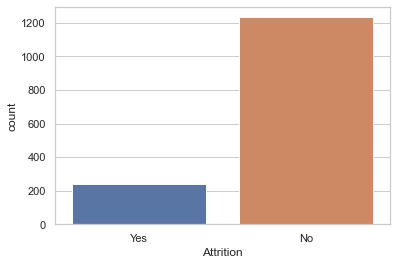

In [548]:
#Attrition
sns.countplot("Attrition", data=df)

In [549]:
#the dependent data is highly imbalanced

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

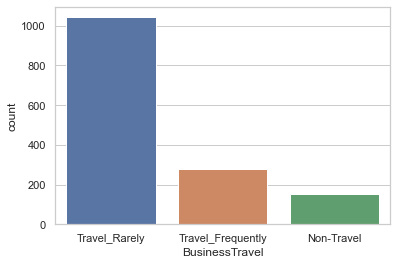

In [550]:
#Buisness Travel
sns.countplot("BusinessTravel", data=df)

In [551]:
#majorty of employes travel rarley due to buisness

<AxesSubplot:xlabel='Department', ylabel='count'>

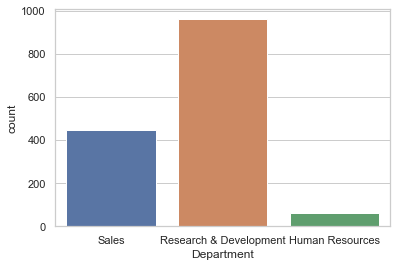

In [552]:
#Department
sns.countplot("Department", data=df)

In [553]:
#The R&d department has most employes

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

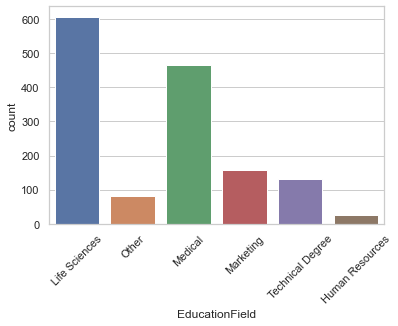

In [554]:
#EducationField
sns.countplot("EducationField", data=df)
plt.xticks(rotation=45)

In [555]:
#majority of employes is from Life Science and medical background

<AxesSubplot:xlabel='Gender', ylabel='count'>

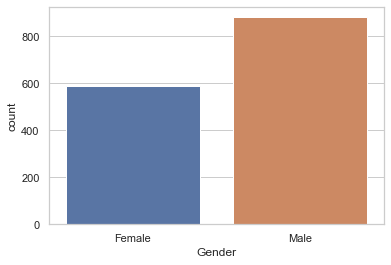

In [556]:
#gender
sns.countplot("Gender", data=df)

In [557]:
#though th enumber of male employ is more than female. female employs are also in good numbers

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

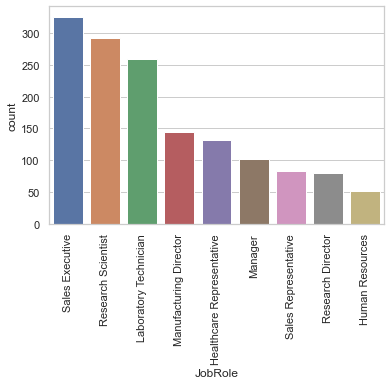

In [558]:
#jobrole
sns.countplot("JobRole", data=df)
plt.xticks(rotation=90)

In [559]:
#though majority of employes works in R&d department, here we can see in that sales executive employes are highest 

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

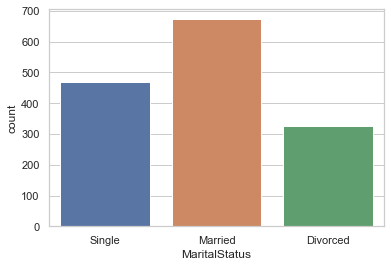

In [560]:
#MaritalStatus
sns.countplot("MaritalStatus", data=df)

In [561]:
#the marital status is somewhere balanced

<AxesSubplot:xlabel='Over18', ylabel='count'>

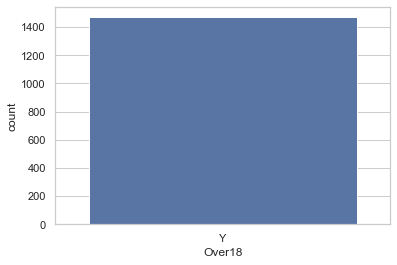

In [562]:
#over18
sns.countplot("Over18", data=df)

In [563]:
#all the employes are over 18

<AxesSubplot:xlabel='OverTime', ylabel='count'>

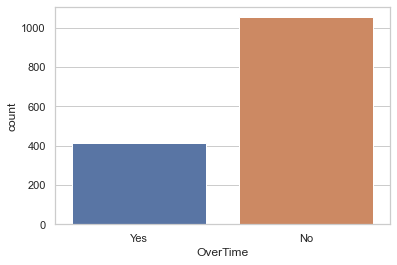

In [564]:
#overtime
sns.countplot("OverTime", data=df)

In [565]:
#very few overtime happens

In [566]:
#craeting a histogram function
def histogram(data_frame,feature_name):
    plt.figure(figsize=(10,6))
    sns.set(style = "whitegrid")
    sns.distplot(data_frame[feature_name],kde=True)

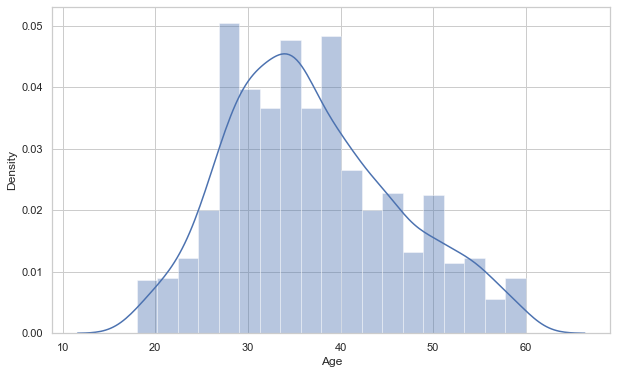

In [567]:
#item Age
histogram(df,"Age")

In [568]:
#majority of the employes are in between 25-40 age group

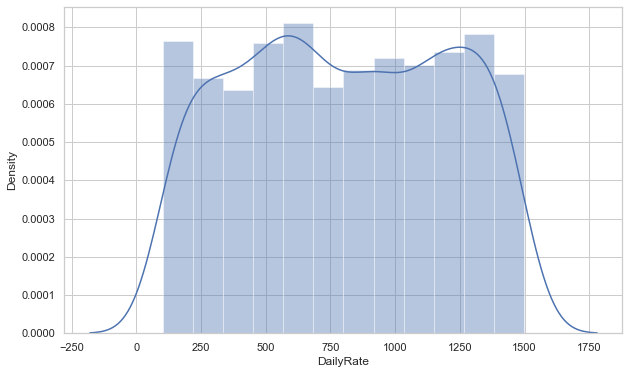

In [569]:
#item DailyRate
histogram(df,"DailyRate")

In [570]:
#the data is equally distributed from 125 to 1500

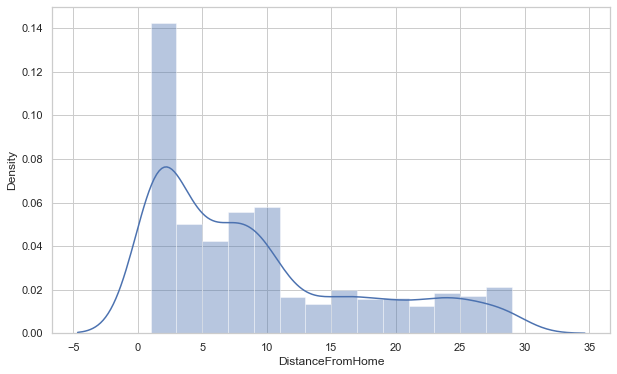

In [571]:
#item Distance from home
histogram(df,"DistanceFromHome")

In [572]:
#majority of the people lives under 5 km 

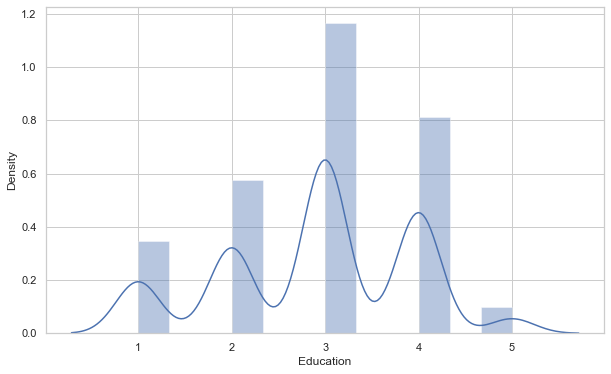

In [573]:
#item Education
histogram(df,"Education")

In [574]:
#the education with type 3 is more in number

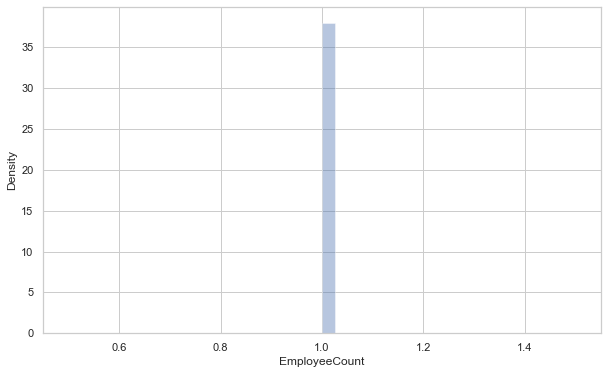

In [575]:
#item EmployeeCount
histogram(df,"EmployeeCount")

In [576]:
#the data is irrelevent for the prediction

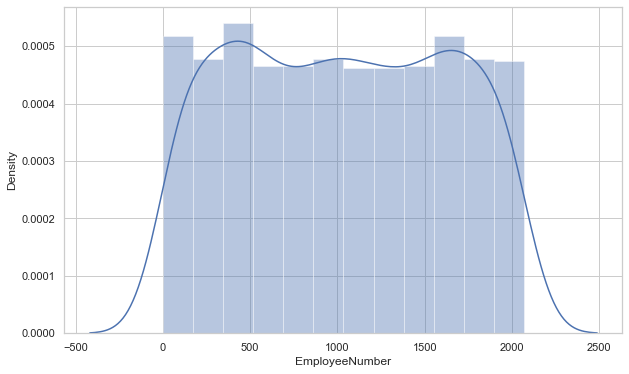

In [577]:
#item EmployeeNumber
histogram(df,"EmployeeNumber")

In [578]:
#the data is spred form 0 to 2k

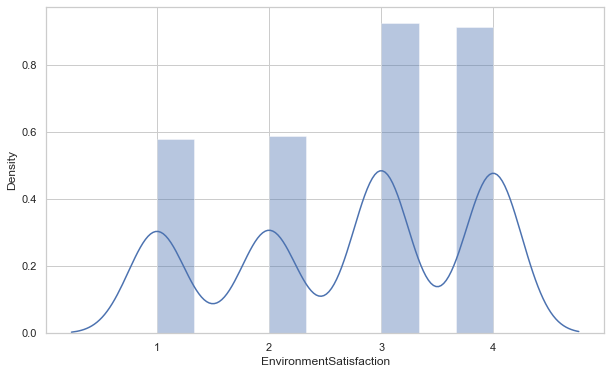

In [579]:
#item EnvironmentSatisfaction
histogram(df,"EnvironmentSatisfaction")

In [580]:
# majority of employes seems satisfied from the enviornment

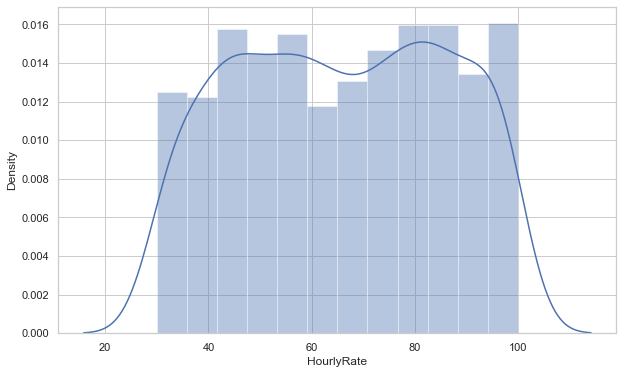

In [581]:
#item Hourlyrate
histogram(df,"HourlyRate")

In [582]:
#the rate ranges from 30 to 100

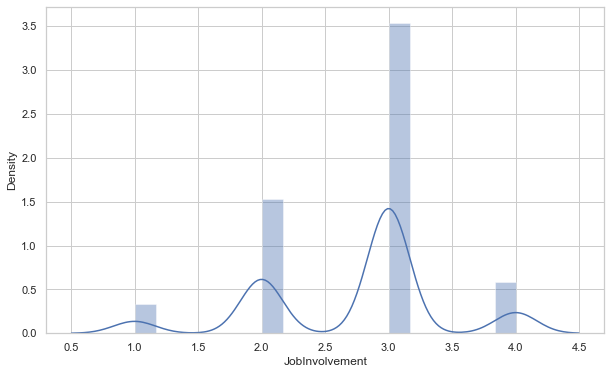

In [583]:
#item Jobinvolvement
histogram(df,"JobInvolvement")

In [584]:
#the employes ar efairly involves in the job

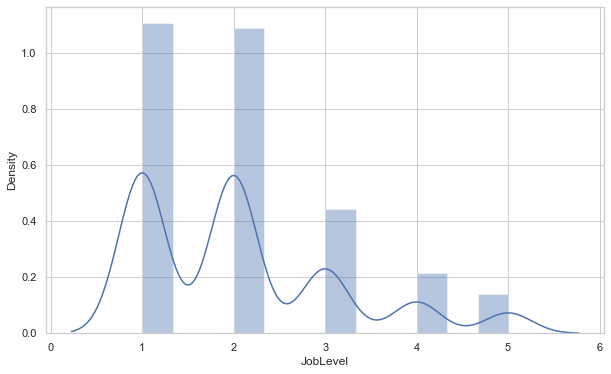

In [585]:
#item joblevel
histogram(df,"JobLevel")

In [586]:
#majory of employes are entery level

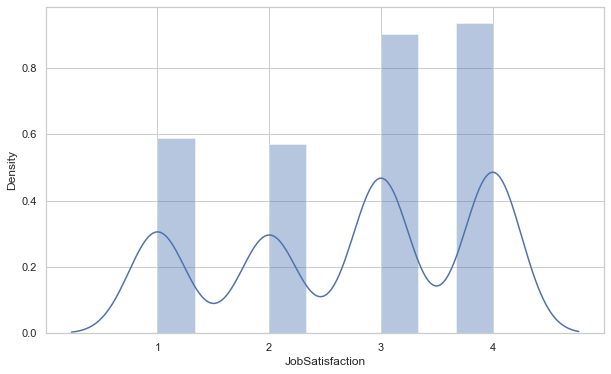

In [587]:
#item satisfation 
histogram(df,"JobSatisfaction")

In [588]:
#there is average satisfaction rate in company

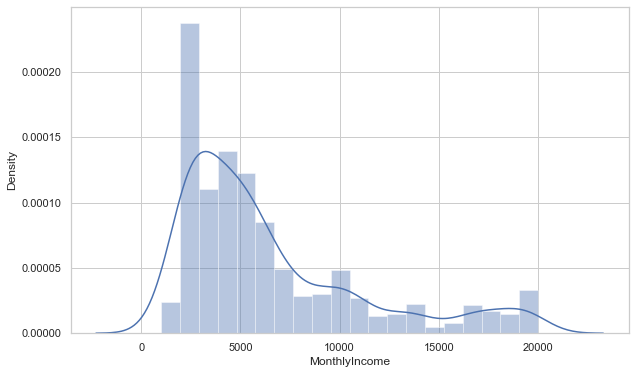

In [589]:
#item MonthlyIncome
histogram(df,"MonthlyIncome")

In [590]:
#as majority of employes are entry level so the salary is also less for majority of employees

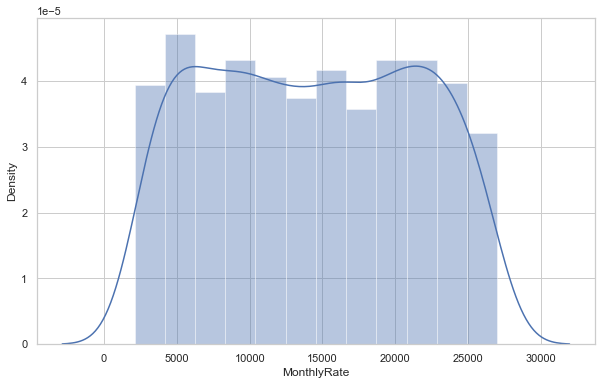

In [591]:
#item MonthlyRate
histogram(df,"MonthlyRate")

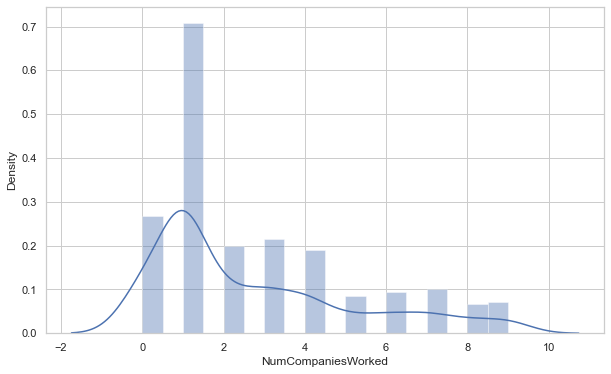

In [592]:
#item NumCompaniesWorked
histogram(df,"NumCompaniesWorked")

In [593]:
#majority of people has just changed companies once before joining the company

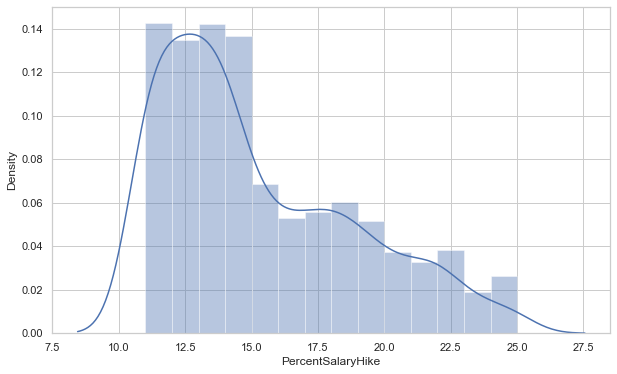

In [594]:
#item PercentSalaryHike
histogram(df,"PercentSalaryHike")

In [595]:
# the average salary hike of the company for the employes lies between 11 to 15 percent

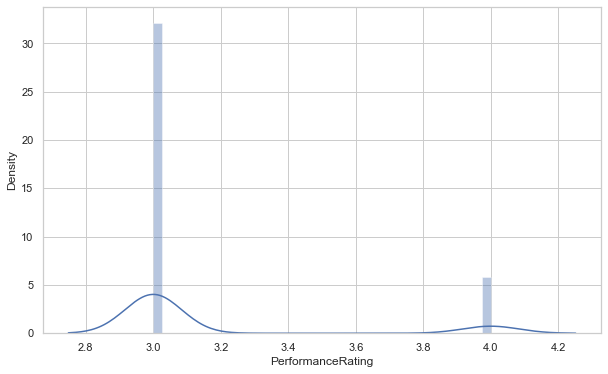

In [596]:
#item Performance rathing
histogram(df,"PerformanceRating")

In [597]:
#aprox all employes has 3 star rating

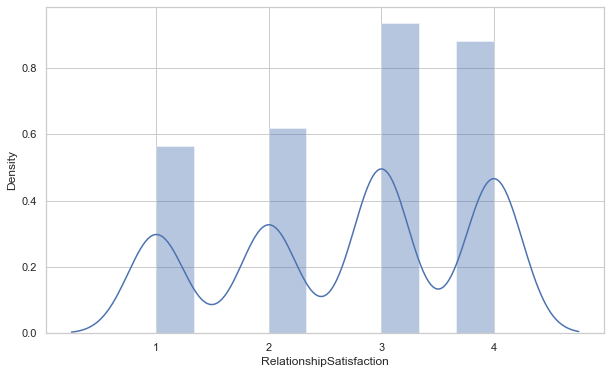

In [598]:
#item Relationship Satisfation
histogram(df,"RelationshipSatisfaction")

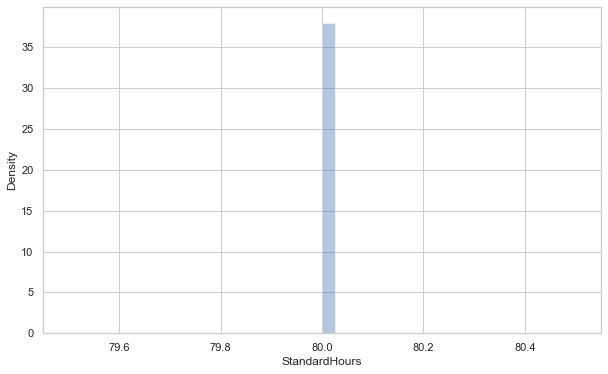

In [599]:
#item Standard Hours
histogram(df,"StandardHours")

In [600]:
#the data is irrelivent for the pridiction

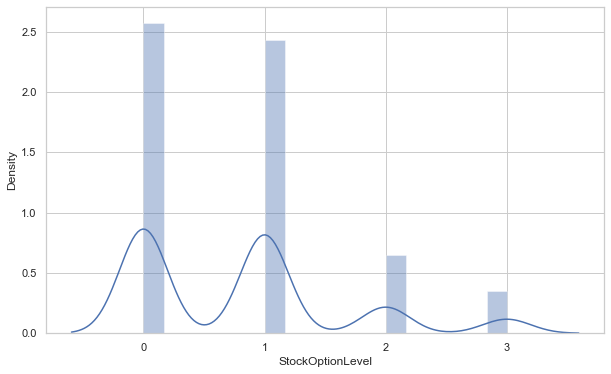

In [601]:
#item 
histogram(df,"StockOptionLevel")

In [602]:
#very few employes get the option of the 3 and 3 level

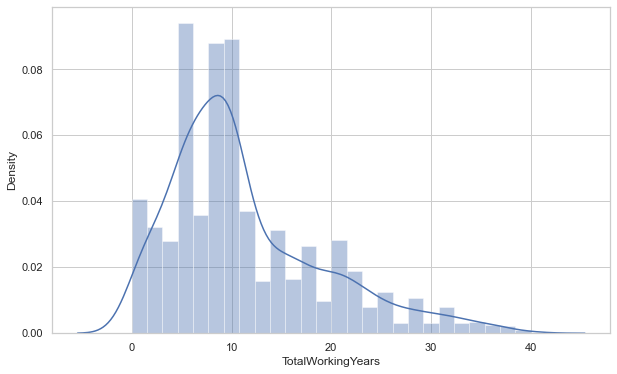

In [603]:
#item Totalworking years
histogram(df,"TotalWorkingYears")

In [604]:
#the majority of employes has working experiance of 5-10 years

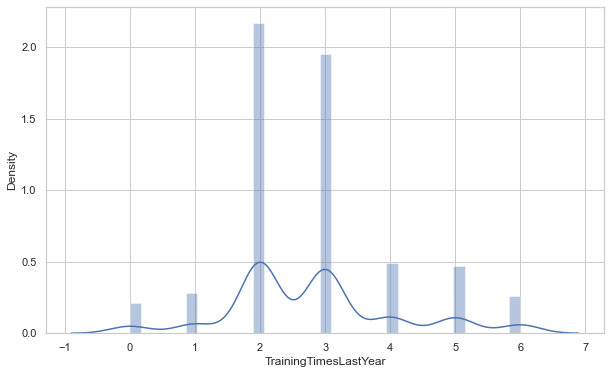

In [605]:
#item TrainingTimesLastYear
histogram(df,"TrainingTimesLastYear")

In [606]:
#majority of employes spend 2-3 month of training time last year

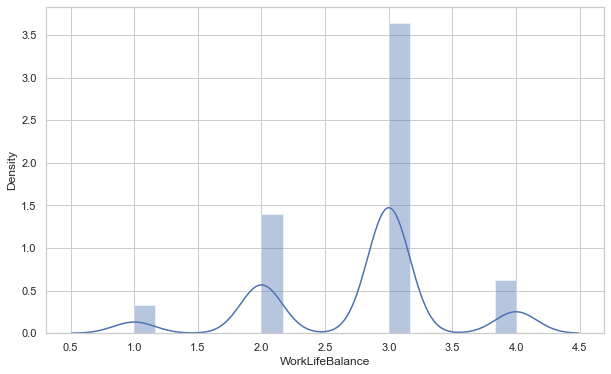

In [607]:
#item WorkLifeBalance
histogram(df,"WorkLifeBalance")

In [608]:
#the company has average work life balance

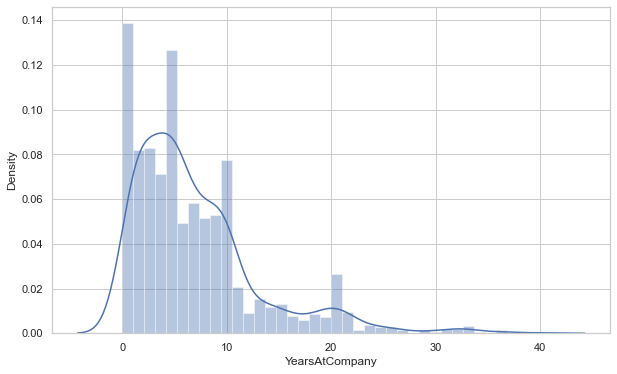

In [609]:
#item YearsAtCompany
histogram(df,"YearsAtCompany")

In [610]:
#as majory of employes are entery level fo there work year in company is also less

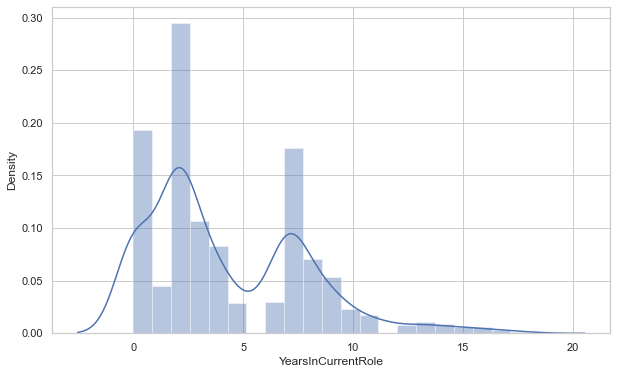

In [611]:
#item YearsInCurrentRole
histogram(df,"YearsInCurrentRole")

In [612]:
#the employes has average working role years lies in 3-7 yers

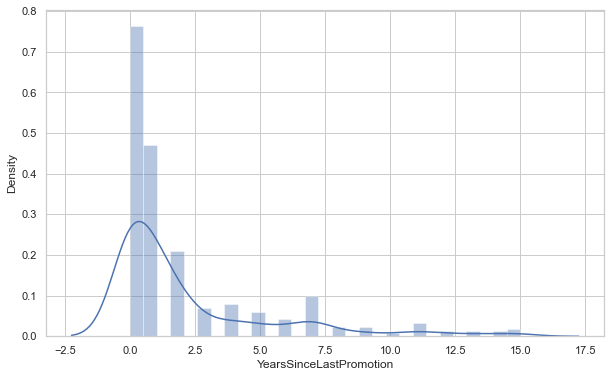

In [613]:
#item YearsSinceLastPromotion
histogram(df,"YearsSinceLastPromotion")

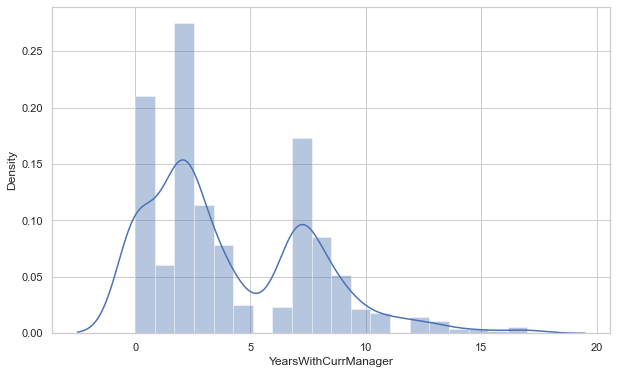

In [614]:
#item YearsWithCurrManager
histogram(df,"YearsWithCurrManager")

In [615]:
#majority of employes has spend approx 3 years with current manager

In [616]:
#Multivariate analysis.

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

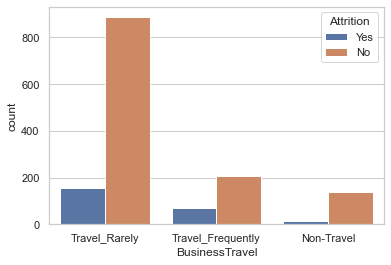

In [617]:
#Buisness Travel
sns.countplot("BusinessTravel", data=df, hue="Attrition")

In [ ]:
#the employees who travel rarel are more prone towads Attration

<AxesSubplot:xlabel='Department', ylabel='count'>

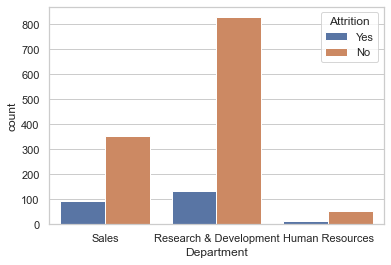

In [618]:
#Department
sns.countplot("Department", data=df,hue="Attrition")

In [ ]:
#as R&D departments contains maximum numbers of employees so the attrition is more these

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

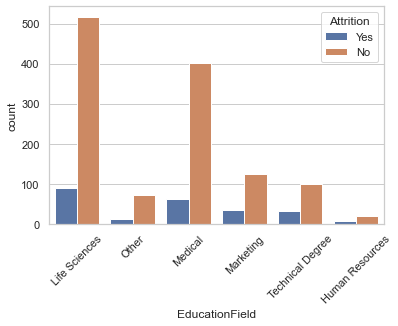

In [619]:
#EducationField
sns.countplot("EducationField", data=df, hue="Attrition")
plt.xticks(rotation=45)


In [ ]:
#the employees from Lifescience  and medical are more in numbers so atterition is more

<AxesSubplot:xlabel='Gender', ylabel='count'>

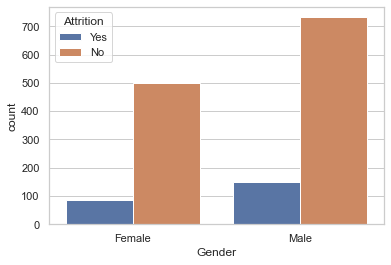

In [620]:
#gender
sns.countplot("Gender", data=df, hue="Attrition")


In [ ]:
#males are more prone towards attrition

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

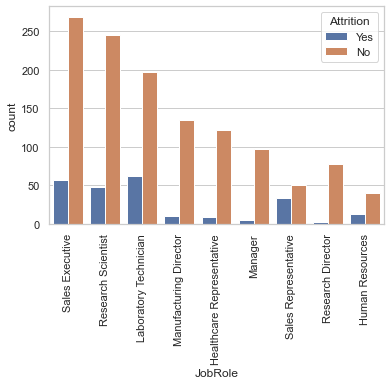

In [621]:
#jobrole
sns.countplot("JobRole", data=df,hue="Attrition")
plt.xticks(rotation=90)


In [ ]:
#labroratory techniciann are more prone towards attrition

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

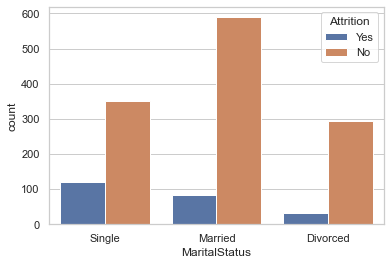

In [622]:
#MaritalStatus
sns.countplot("MaritalStatus", data=df, hue="Attrition")


In [ ]:
#employess who are single are more inclined towards attrition

<AxesSubplot:xlabel='OverTime', ylabel='count'>

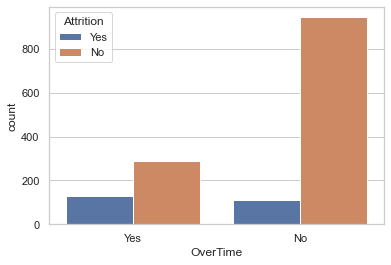

In [624]:
#overtime
sns.countplot("OverTime", data=df, hue="Attrition")


In [1]:
#employees doing overtime are  slightly more prone towards attrition

<AxesSubplot:xlabel='Age', ylabel='count'>

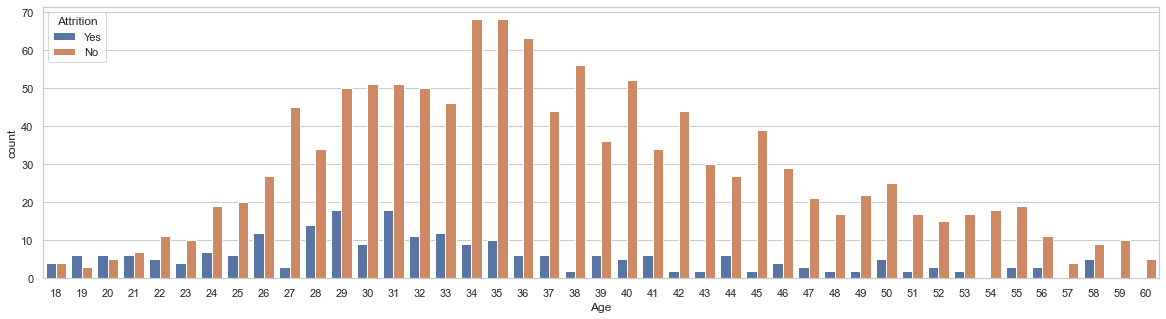

In [625]:
#Age
plt.figure(figsize=(20,5))
sns.countplot("Age", data=df, hue="Attrition")

In [ ]:
#in the age group of 24 t0 35 ar emore inclined towards attrition 

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

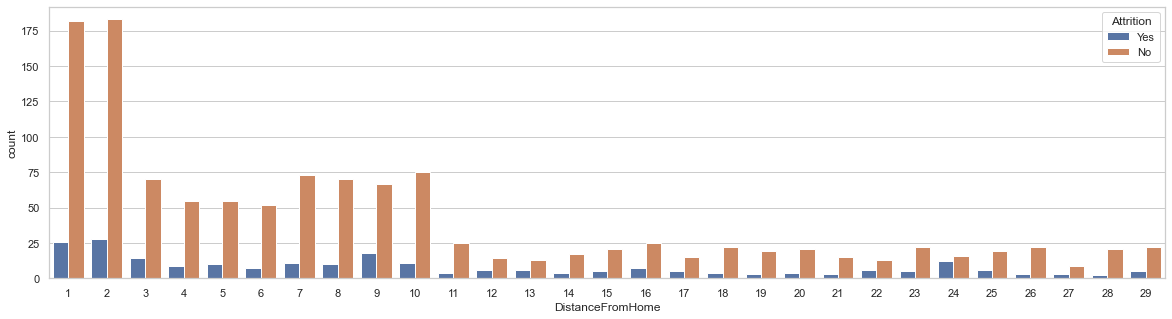

In [626]:
#Distance from home
plt.figure(figsize=(20,5))
sns.countplot("DistanceFromHome", data=df, hue="Attrition")

In [ ]:
#the employees with less distance from office are more prone towars attrition

<AxesSubplot:xlabel='Education', ylabel='count'>

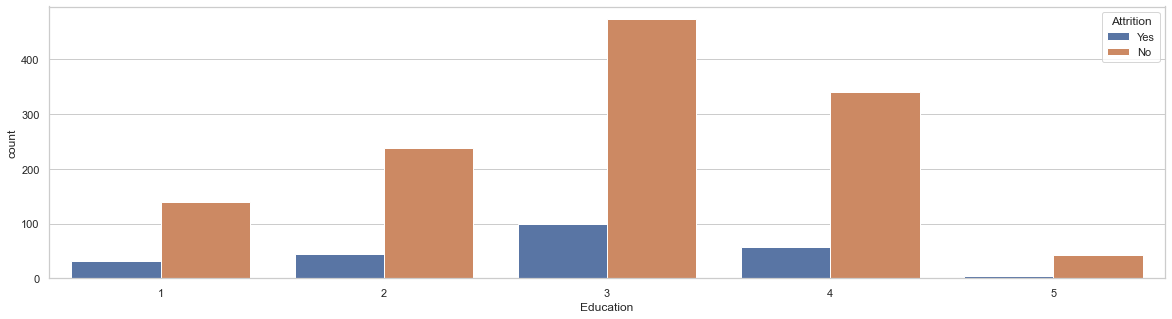

In [627]:
#Education
plt.figure(figsize=(20,5))
sns.countplot("Education", data=df, hue="Attrition")

In [ ]:
#employees with education level 3 are more prone towards attrition

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

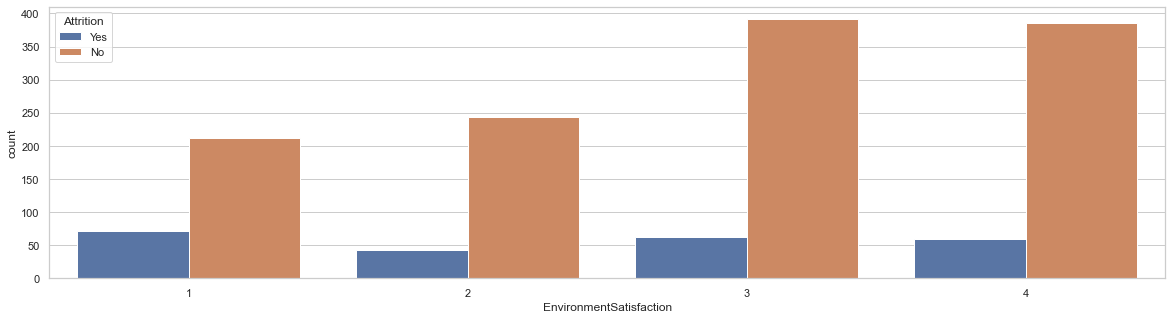

In [629]:
#EnviornmentSatisfaction
plt.figure(figsize=(20,5))
sns.countplot("EnvironmentSatisfaction", data=df, hue="Attrition")

In [ ]:
#enviornemnt satisfaction is less correlated towrds attrition

<AxesSubplot:xlabel='HourlyRate', ylabel='count'>

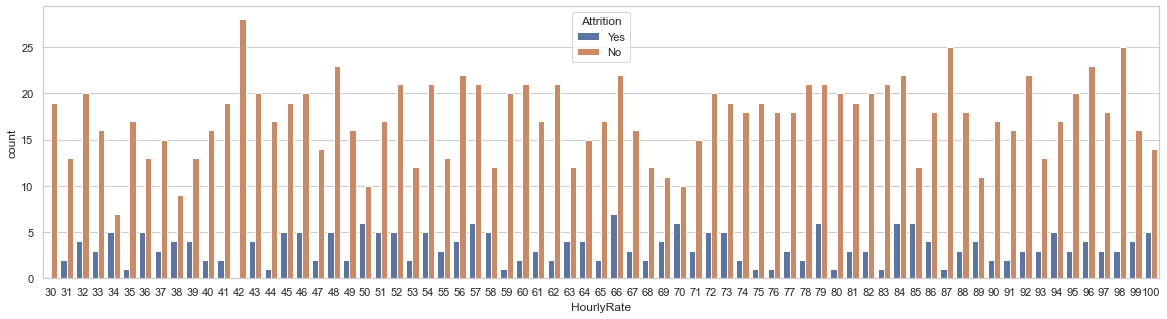

In [630]:
#HourlyRate
plt.figure(figsize=(20,5))
sns.countplot("HourlyRate", data=df, hue="Attrition")

In [ ]:
#Hourly rate are also les correlated towards attrition

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

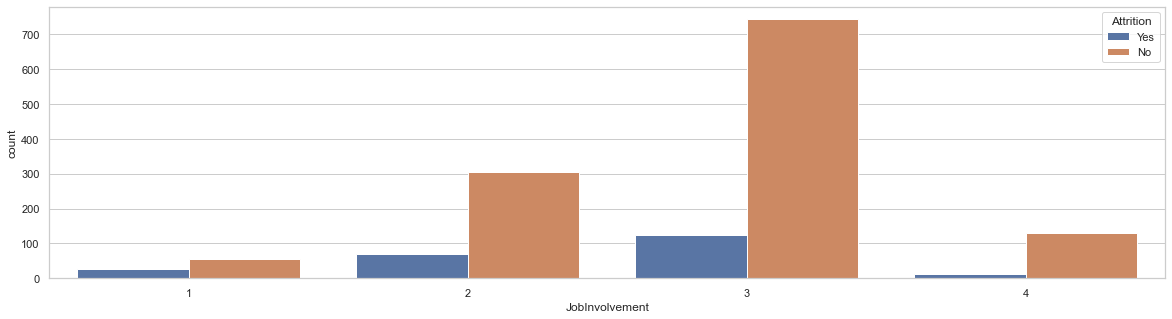

In [631]:
#jobinvolvement
plt.figure(figsize=(20,5))
sns.countplot("JobInvolvement", data=df, hue="Attrition")

In [ ]:
#people who are involved in max job invlvemnet are less prone towards Attrition

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

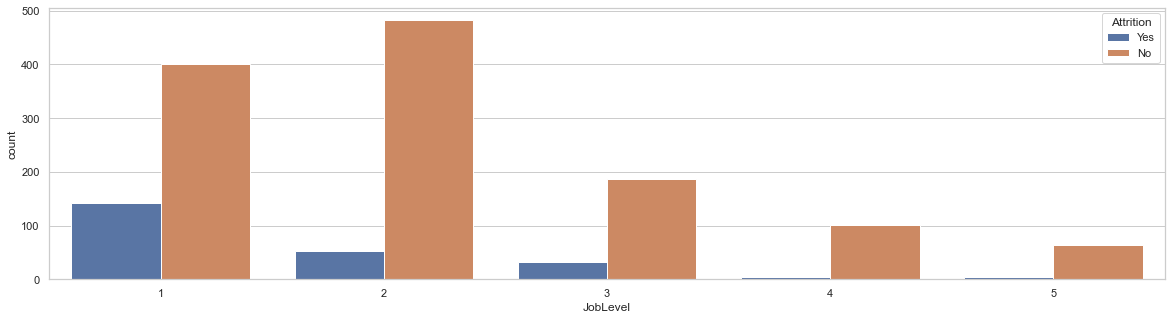

In [632]:
#joblevel
plt.figure(figsize=(20,5))
sns.countplot("JobLevel", data=df, hue="Attrition")

In [ ]:
#with the increase in joblevel people become less inclined towards attrition

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

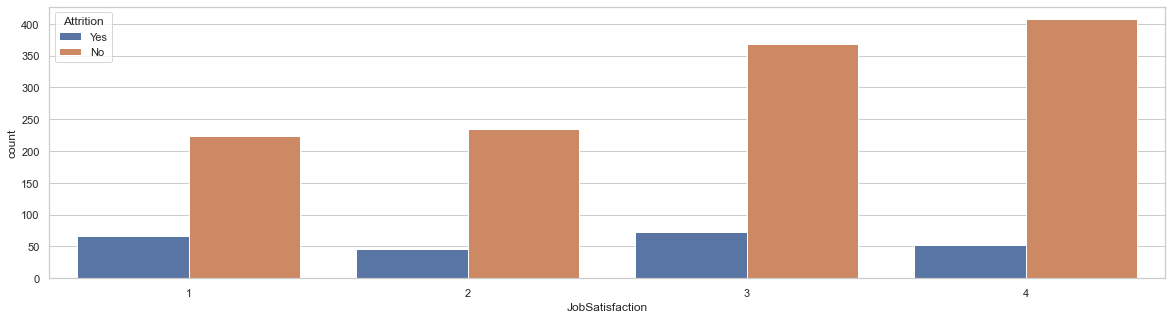

In [633]:
#jobsatisfaction
plt.figure(figsize=(20,5))
sns.countplot("JobSatisfaction", data=df, hue="Attrition")

In [ ]:
#JOb satisfaction is less correlated towards attrition

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

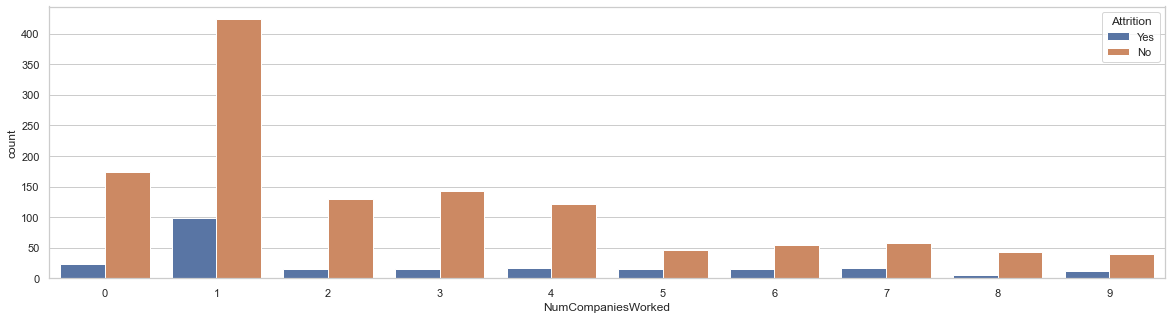

In [634]:
#NumCompaniesWorked
plt.figure(figsize=(20,5))
sns.countplot("NumCompaniesWorked", data=df, hue="Attrition")

In [ ]:
#people with minimum number of companies worked are more inclined towrds attrition

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

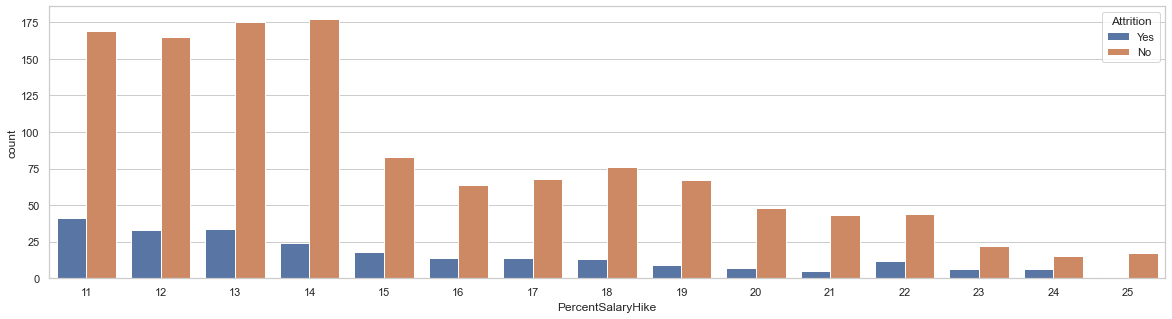

In [635]:
#PercentSalaryHike
plt.figure(figsize=(20,5))
sns.countplot("PercentSalaryHike", data=df, hue="Attrition")

In [ ]:
#increse in salary discourage the attrition

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

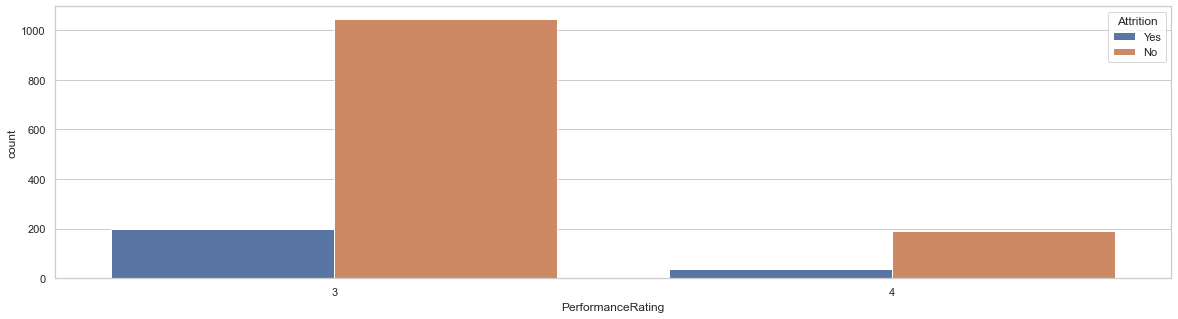

In [636]:
#performance rating
plt.figure(figsize=(20,5))
sns.countplot("PerformanceRating", data=df, hue="Attrition")

In [ ]:
#people with great performance are less inclined towards attrition

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

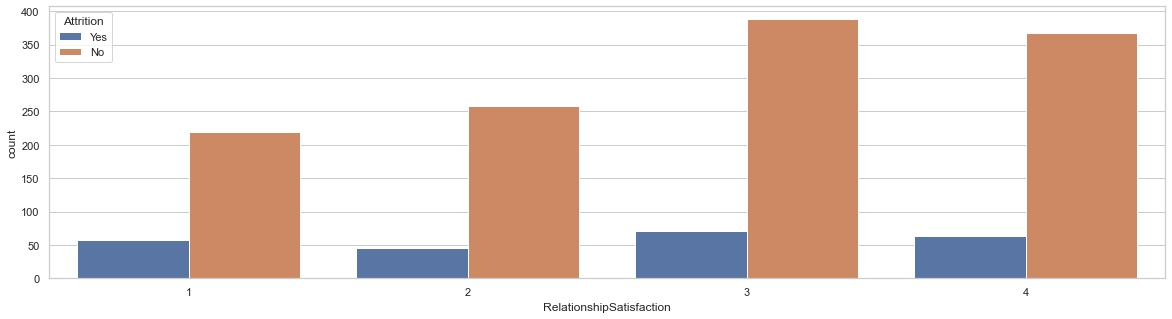

In [637]:
#realtioshipSatisfaction
plt.figure(figsize=(20,5))
sns.countplot("RelationshipSatisfaction", data=df, hue="Attrition")

In [ ]:
#it is less correlated towards attrition

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

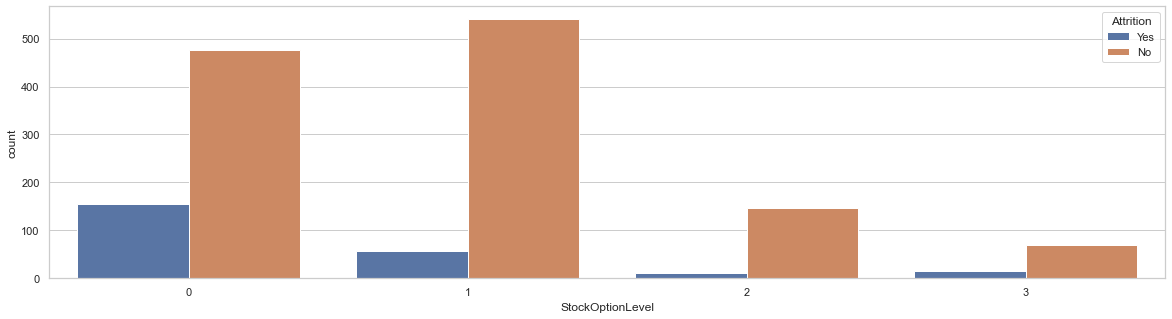

In [639]:
#stockleveloption
plt.figure(figsize=(20,5))
sns.countplot("StockOptionLevel", data=df, hue="Attrition")

In [ ]:
#with increase in stock option level attrition decresses

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

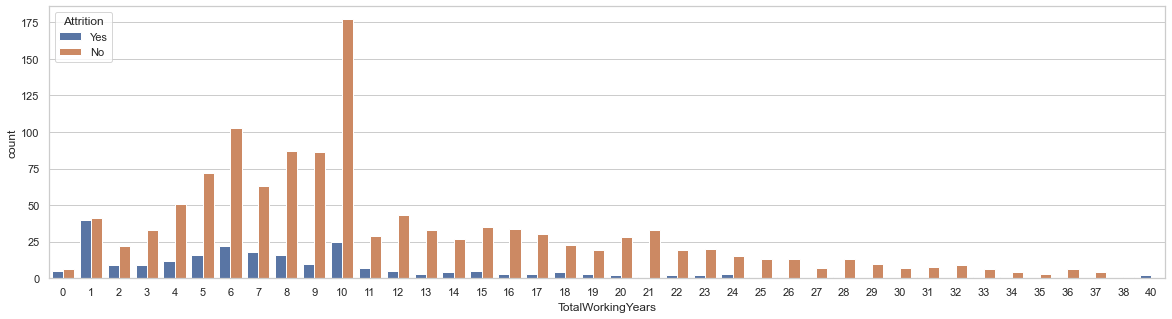

In [640]:
#Total working year
plt.figure(figsize=(20,5))
sns.countplot("TotalWorkingYears", data=df, hue="Attrition")

In [ ]:
#people with less workin year are more inclined towards attrition

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

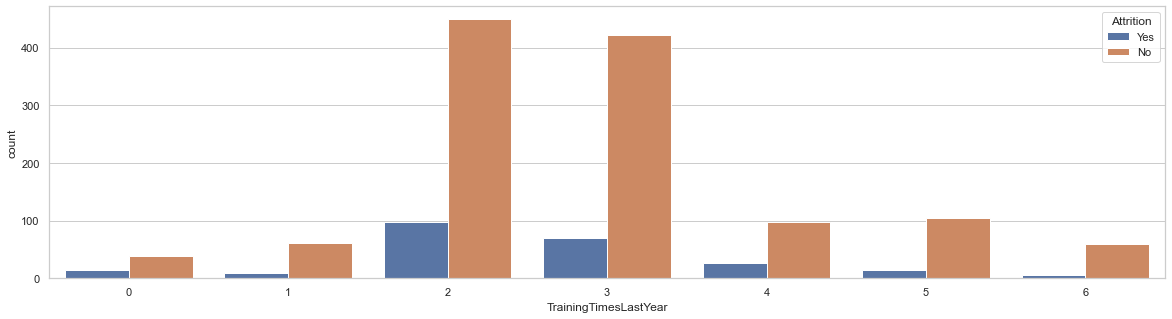

In [641]:
#TrainingTime LAstyear
plt.figure(figsize=(20,5))
sns.countplot("TrainingTimesLastYear", data=df, hue="Attrition")

In [ ]:
#people with average Training time last year are more inclined towards attrition

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

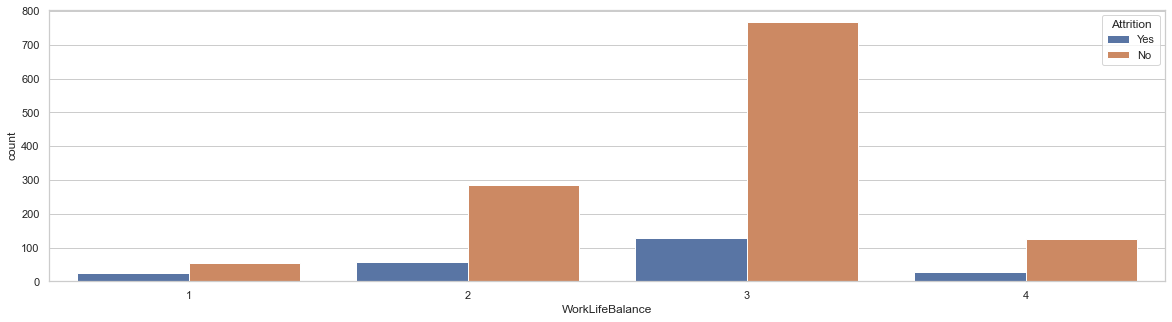

In [642]:
#workLifebalance
plt.figure(figsize=(20,5))
sns.countplot("WorkLifeBalance", data=df, hue="Attrition")

In [ ]:
#employees with average work life balance are more prone towards attrition

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

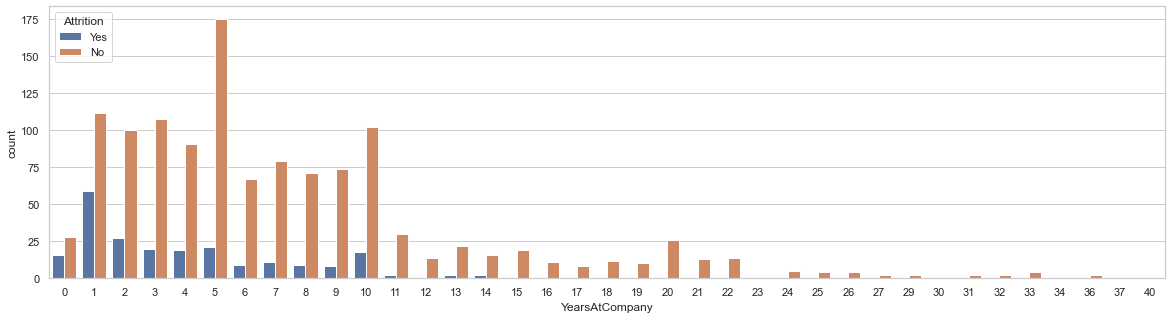

In [643]:
#years at company
plt.figure(figsize=(20,5))
sns.countplot("YearsAtCompany", data=df, hue="Attrition")

In [ ]:
#with increases  in years in company attrition probability decresses

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

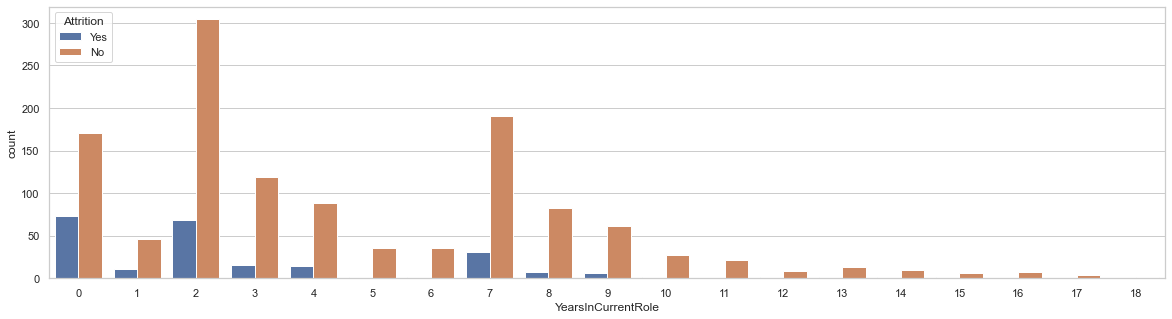

In [644]:
#years in current role
plt.figure(figsize=(20,5))
sns.countplot("YearsInCurrentRole", data=df, hue="Attrition")

In [ ]:
#freshers are more inclined towards attrition

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

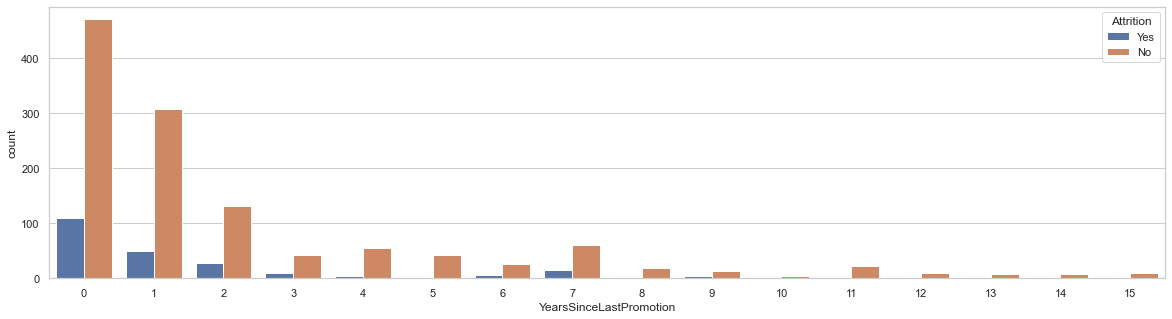

In [645]:
#Years since last promotion
plt.figure(figsize=(20,5))
sns.countplot("YearsSinceLastPromotion", data=df, hue="Attrition")

In [ ]:
#years since last promotion is negetively correlated with attrition

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

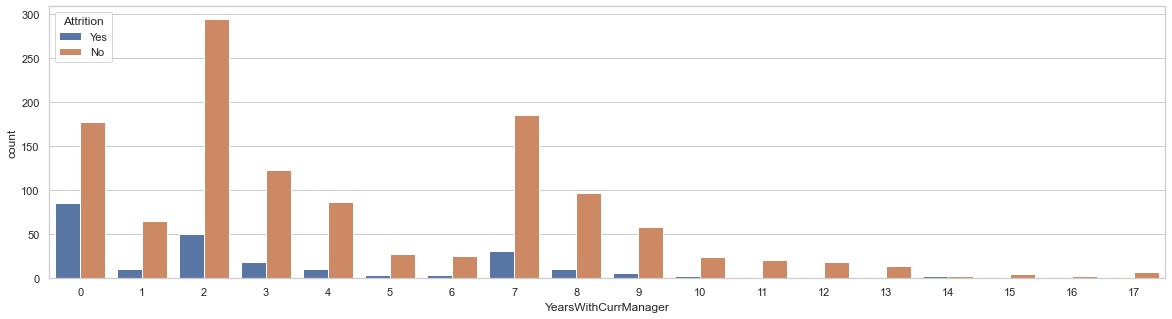

In [646]:
#years with current manager
plt.figure(figsize=(20,5))
sns.countplot("YearsWithCurrManager", data=df, hue="Attrition")

In [ ]:
#with increase in years with curr manager attrition probability decresses 

In [647]:
#labeling the categorical values by label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Attrition"]=le.fit_transform(df["Attrition"].values)
df["BusinessTravel"]=le.fit_transform(df["BusinessTravel"].values)
df["Department"]=le.fit_transform(df["Department"].values)
df["EducationField"]=le.fit_transform(df["EducationField"].values)
df["Gender"]=le.fit_transform(df["Gender"].values)
df["JobRole"]=le.fit_transform(df["JobRole"].values)
df["MaritalStatus"]=le.fit_transform(df["MaritalStatus"].values)
df["Over18"]=le.fit_transform(df["Over18"].values)
df["OverTime"]=le.fit_transform(df["OverTime"].values)

In [648]:
#checking the coffecient
cor=df.corr()

<AxesSubplot:>

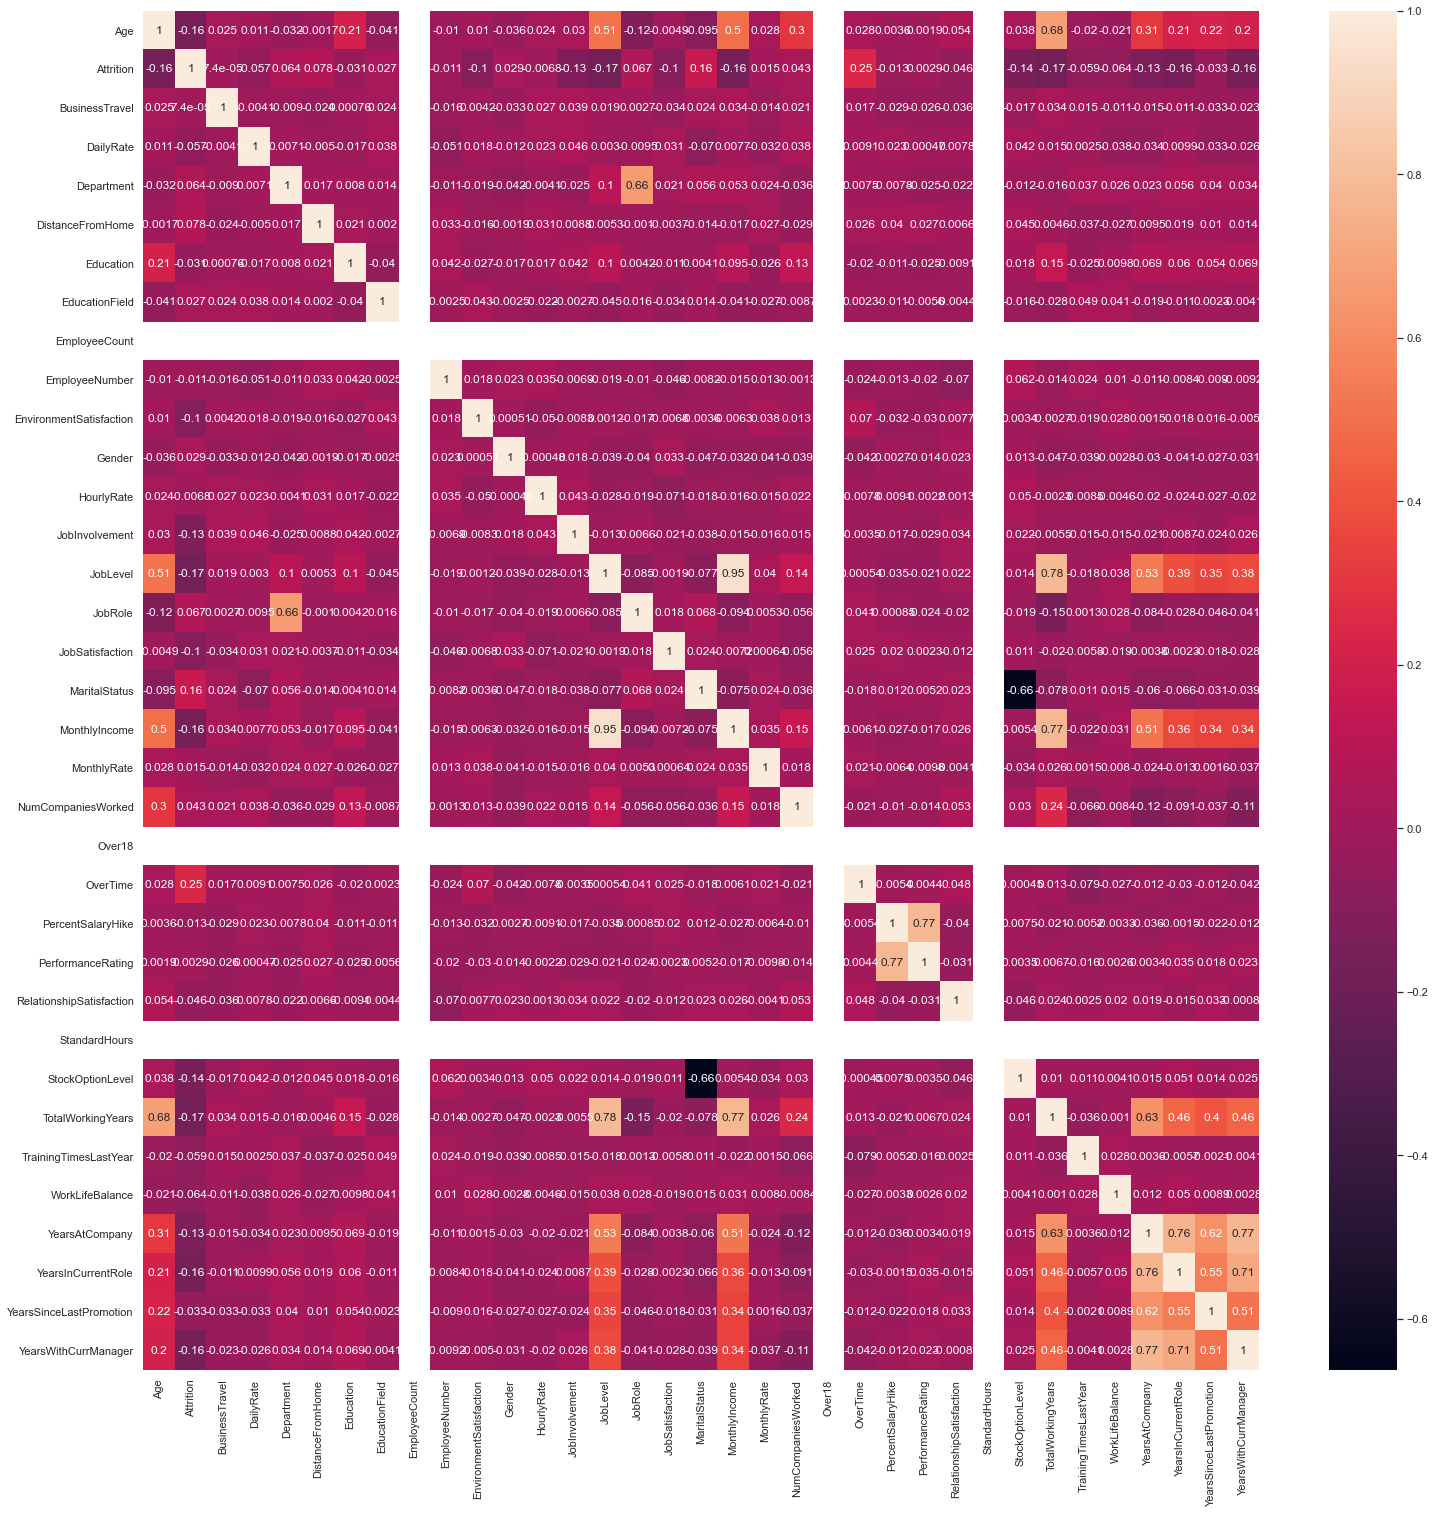

In [649]:
#using heatmap 
plt.figure(figsize=(25,25))
sns.heatmap(cor,annot=True)

In [650]:
#since there are to many columns, sorting correlation with attrition in desending order
df.corr()["Attrition"].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

In [651]:
#Employe count ,over18 and standardhours are having nan corelation with attrition.
#performance rating buisness travel and hourly rate are close to zero 
#droping these values

In [652]:
df.drop(["EmployeeCount","Over18","StandardHours","PerformanceRating","BusinessTravel","HourlyRate"],axis=1,inplace=True)

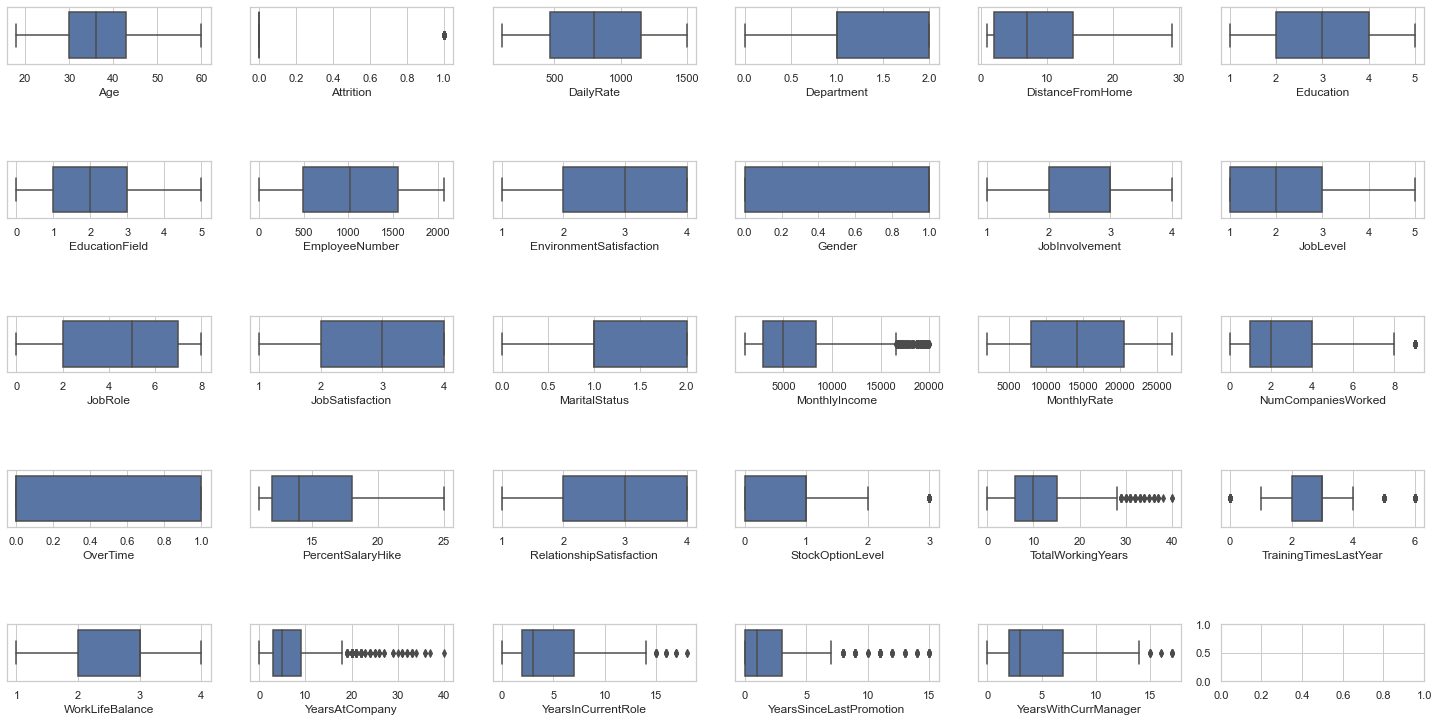

In [653]:
#ploting boxplot to check oultiers
fig, ax=plt.subplots(ncols=6,nrows=5, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sns.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [ ]:
#there ar emany columns with outliers likke yearswithcurmanager, yearssincelastpromotion,totalworkingyears,yearsatcompany,monthlyincome,
#there are outliers in categorical value also.
#with zscore methor we are lossing more than 10 percent of the data so we will use IQR method to treat outliers

In [654]:
#function to apply IQR
#Also there can be no negative value so the lower bridge is replaced with 25th percentile for the number =<0
def outlier_IQR(data_frame,feature_name):
    histogram(data_frame,feature_name)
    IQR = data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25)
    upper_bridge = data_frame[feature_name].quantile(0.75)+(IQR*1.5)
    df.loc[data_frame[feature_name]>=upper_bridge,feature_name]=upper_bridge
    df.loc[data_frame[feature_name]<=0,feature_name]=lower_bridge
    histogram(data_frame,feature_name)

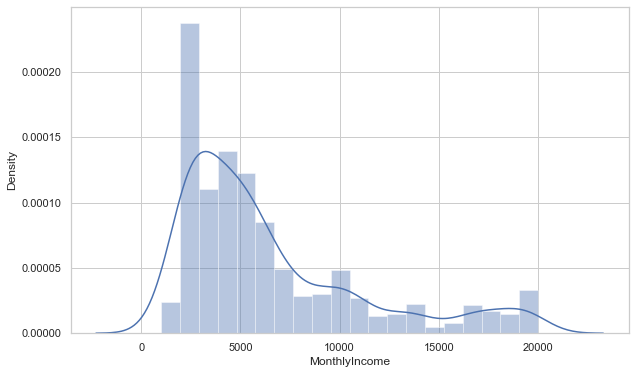

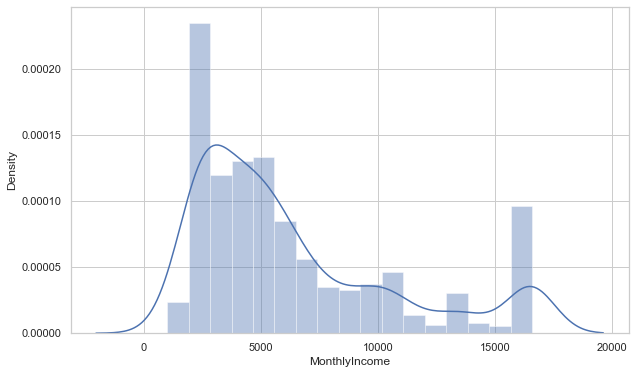

In [655]:
#MonthlyIncome
outlier_IQR(df,"MonthlyIncome")

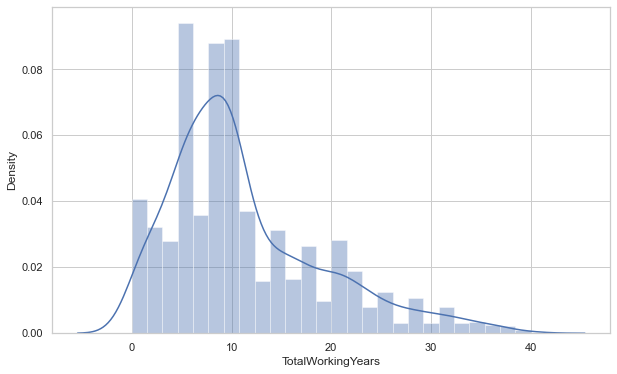

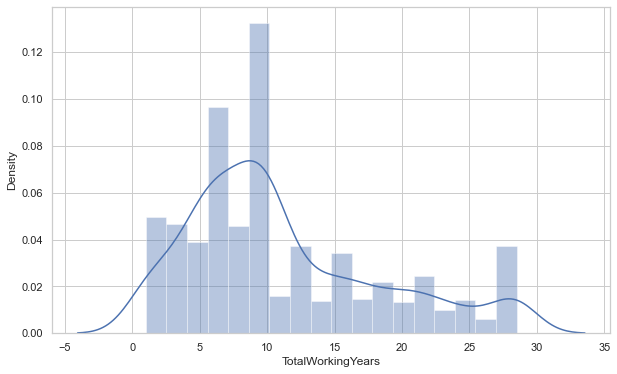

In [656]:
#TotalWorkingYears
outlier_IQR(df,"TotalWorkingYears")

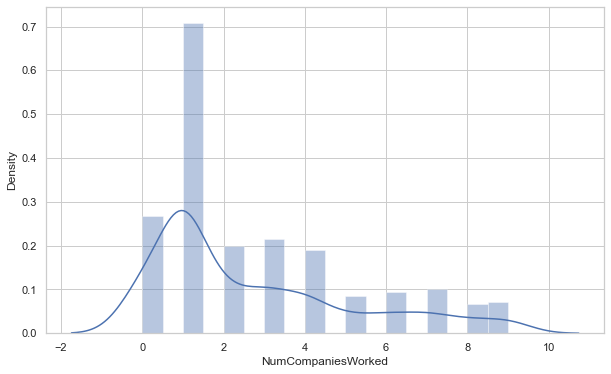

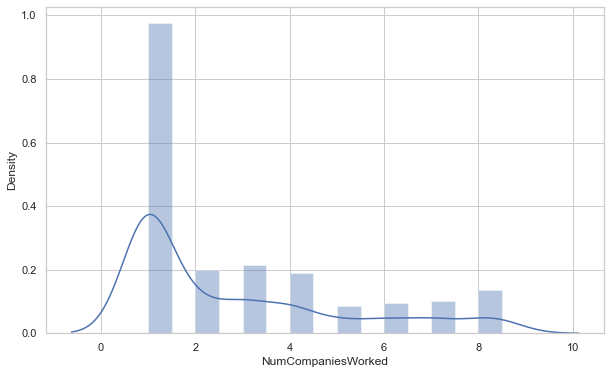

In [657]:
#NumCompaniesWorked
outlier_IQR(df,"NumCompaniesWorked")

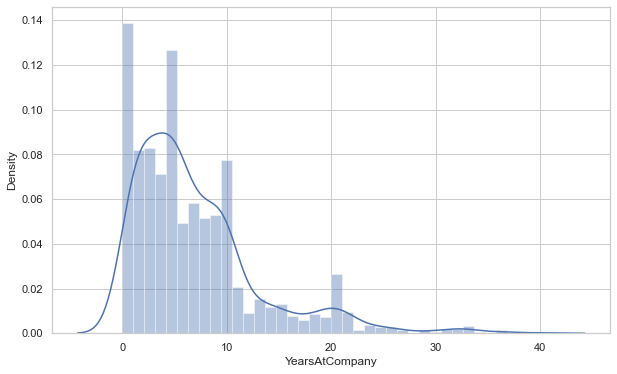

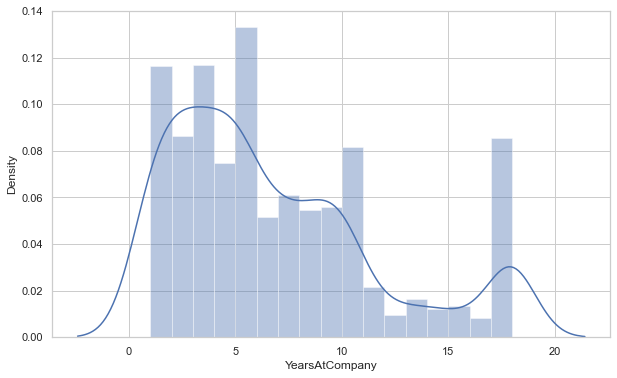

In [658]:
#YearsAtCompany
outlier_IQR(df,"YearsAtCompany")

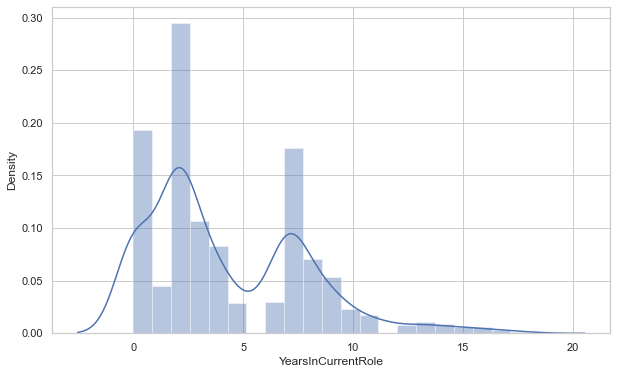

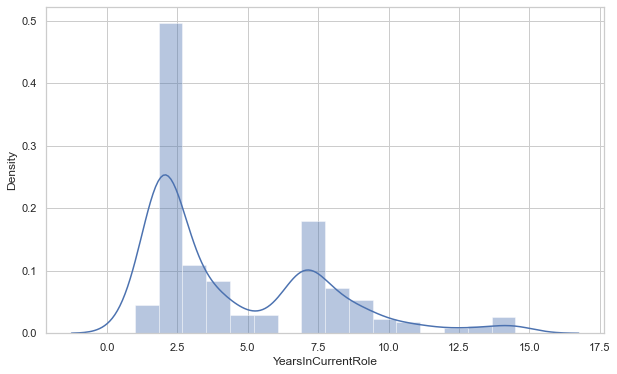

In [659]:
#YearsInCurrentRole
outlier_IQR(df,"YearsInCurrentRole")

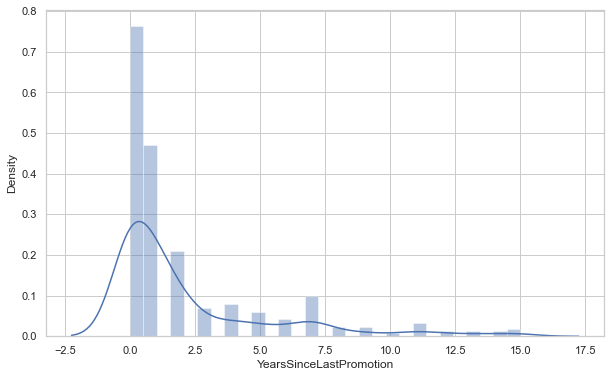

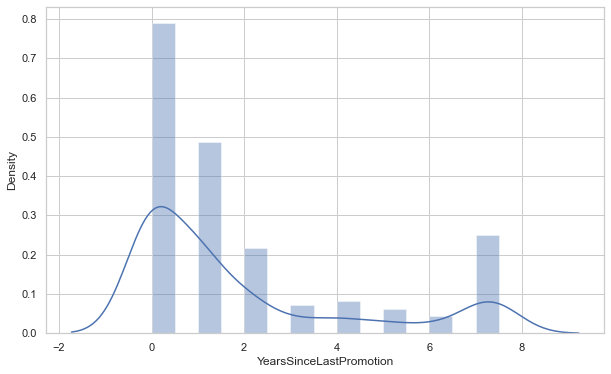

In [660]:
#YearsSinceLastPromotion
outlier_IQR(df,"YearsSinceLastPromotion")

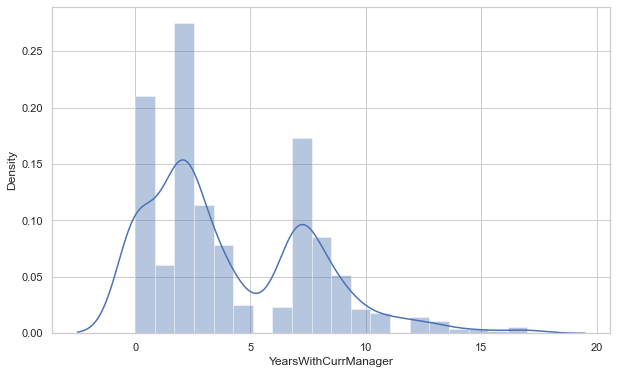

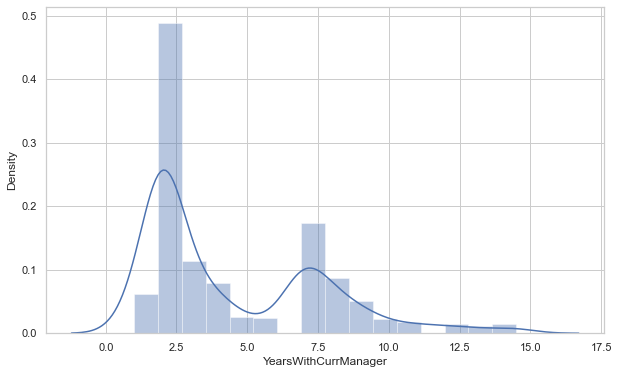

In [661]:
YearsWithCurrManager
outlier_IQR(df,"YearsWithCurrManager")

In [662]:
#checking for skewness
df.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.168595
MonthlyRate                 0.018578
NumCompaniesWorked          1.118062
OverTime                    0.964489
PercentSalaryHike           0.821128
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           0.879074
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              0.960439
YearsInCurrentRole          1.082910
Y

In [ ]:
#there are skewness in some columns

In [663]:
#spliting data in x and y
x=df.drop("Attrition", axis=1)
x

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,2,1,2,1,1,2,0,3,...,11,1,0,8.0,0,1,6.0,4.0,0.0,5.0
1,49,279,1,8,1,1,2,3,1,2,...,23,4,1,10.0,3,3,10.0,7.0,1.0,7.0
2,37,1373,1,2,2,4,4,4,1,2,...,15,2,0,7.0,3,3,3.0,2.0,0.0,2.0
3,33,1392,1,3,4,1,5,4,0,3,...,11,3,0,8.0,3,3,8.0,7.0,3.0,2.0
4,27,591,1,2,1,3,7,1,1,3,...,12,4,1,6.0,3,3,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,1,23,2,3,2061,3,1,4,...,17,3,1,17.0,3,3,5.0,2.0,0.0,3.0
1466,39,613,1,6,1,3,2062,4,1,2,...,15,1,1,9.0,5,3,7.0,7.0,1.0,7.0
1467,27,155,1,4,3,1,2064,2,1,4,...,20,2,1,6.0,0,3,6.0,2.0,0.0,3.0
1468,49,1023,2,2,3,3,2065,4,1,2,...,14,4,0,17.0,3,2,9.0,6.0,0.0,8.0


In [664]:
y=df["Attrition"]
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [665]:
#treating skewness with power transform
from sklearn.preprocessing import power_transform

In [666]:
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [667]:
#checking for skewness
df_new.skew()

Age                        -0.007603
DailyRate                  -0.196160
Department                  0.013801
DistanceFromHome           -0.007468
Education                  -0.099881
EducationField             -0.008386
EmployeeNumber             -0.288025
EnvironmentSatisfaction    -0.205395
Gender                     -0.408665
JobInvolvement             -0.020365
JobLevel                    0.103624
JobRole                    -0.319659
JobSatisfaction            -0.212815
MaritalStatus              -0.156911
MonthlyIncome               0.000000
MonthlyRate                -0.184087
NumCompaniesWorked          0.297139
OverTime                    0.964489
PercentSalaryHike           0.116250
RelationshipSatisfaction   -0.193634
StockOptionLevel            0.087019
TotalWorkingYears          -0.025062
TrainingTimesLastYear       0.058058
WorkLifeBalance            -0.012286
YearsAtCompany             -0.017723
YearsInCurrentRole          0.131860
YearsSinceLastPromotion     0.187060
Y

In [668]:

x=df_new

In [677]:
#importing libraries for model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

<AxesSubplot:xlabel='Attrition', ylabel='count'>

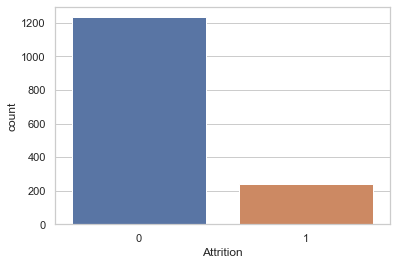

In [670]:
#the dependent varible is unbalenced
sns.countplot(y)

In [671]:
#using upsampling to balance the data
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
#data transformation
x,y = oversample.fit_resample(x,y)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

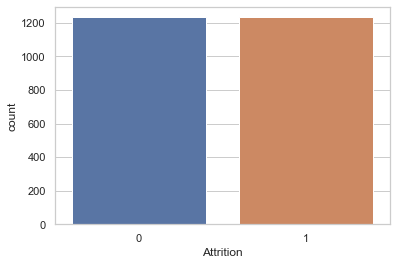

In [673]:
#balanced data
sns.countplot(y)

In [674]:
#spliting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=56)

In [675]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1726, 28), (740, 28), (1726,), (740,))

In [676]:
# function to train, test and performance check 
def model(name):
    model=name()
    model.fit(x_train,y_train)
    predict=model.predict(x_test)
    print("""The classification report is:
    """,classification_report(y_test, predict))
       
    print("The accuracy score is: ", accuracy_score(y_test,predict))
    
    
    print("""The confusion matrix is:
    
    """,confusion_matrix(y_test,predict))

In [678]:
#DecisionTreeClassifier
model(DecisionTreeClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.85      0.80      0.83       359
           1       0.82      0.87      0.85       381

    accuracy                           0.84       740
   macro avg       0.84      0.84      0.84       740
weighted avg       0.84      0.84      0.84       740

The accuracy score is:  0.8378378378378378
The confusion matrix is:
    
     [[288  71]
 [ 49 332]]


In [679]:
print(cross_val_score(DecisionTreeClassifier(),x,y,cv=5).mean())

0.7369192993405654


In [680]:
#RandomForestClassifier
model(RandomForestClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.90      0.96      0.93       359
           1       0.96      0.90      0.93       381

    accuracy                           0.93       740
   macro avg       0.93      0.93      0.93       740
weighted avg       0.93      0.93      0.93       740

The accuracy score is:  0.9297297297297298
The confusion matrix is:
    
     [[345  14]
 [ 38 343]]


In [681]:
print(cross_val_score(RandomForestClassifier(),x,y,cv=5).mean())

0.8844700298100532


In [682]:
#SVC
model(SVC)

The classification report is:
                   precision    recall  f1-score   support

           0       0.93      0.91      0.92       359
           1       0.92      0.93      0.92       381

    accuracy                           0.92       740
   macro avg       0.92      0.92      0.92       740
weighted avg       0.92      0.92      0.92       740

The accuracy score is:  0.9216216216216216
The confusion matrix is:
    
     [[327  32]
 [ 26 355]]


In [683]:
print(cross_val_score(SVC(),x,y,cv=5).mean())

0.8945767054553219


In [684]:
#Naive Bayes
model(GaussianNB)

The classification report is:
                   precision    recall  f1-score   support

           0       0.72      0.74      0.73       359
           1       0.75      0.73      0.74       381

    accuracy                           0.74       740
   macro avg       0.74      0.74      0.74       740
weighted avg       0.74      0.74      0.74       740

The accuracy score is:  0.7351351351351352
The confusion matrix is:
    
     [[267  92]
 [104 277]]


In [685]:
print(cross_val_score(GaussianNB(),x,y,cv=5).mean())

0.6906192771677986


In [686]:
#KNeighborsClassifier
model(KNeighborsClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.97      0.64      0.78       359
           1       0.75      0.98      0.85       381

    accuracy                           0.82       740
   macro avg       0.86      0.81      0.81       740
weighted avg       0.86      0.82      0.81       740

The accuracy score is:  0.8189189189189189
The confusion matrix is:
    
     [[231 128]
 [  6 375]]


In [687]:
print(cross_val_score(KNeighborsClassifier(),x,y,cv=5).mean())

0.7887436253295119


In [2]:
#in svc model the accurcay score is high , also the differance in crossvalscore and accuracy score is minimum so svc is our best model

In [707]:
#parameters for hyperparametertuning
parameter = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ["linear", "poly", "rbf", "sigmoid"],
             'decision_function_shape' :["ovo", "ovr"]
            } 

In [708]:
#using GridSearchCV for Hyper parameter tunning
gcv=GridSearchCV(SVC(),parameter,cv=5)

In [709]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [710]:
#checking best parameters
gcv.best_params_

{'C': 10, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'kernel': 'rbf'}

In [713]:
#building final model
best_model=SVC(C=10,decision_function_shape="ovo",gamma=0.1,kernel="rbf")
best_model.fit(x_train,y_train)
pred=best_model.predict(x_test)
print("""The classification report is:
    """,classification_report(y_test, pred))
       
print("The accuracy score is: ", accuracy_score(y_test,pred))
    
    
print("""The confusion matrix is:
    
    """,confusion_matrix(y_test,pred))

The classification report is:
                   precision    recall  f1-score   support

           0       0.99      0.97      0.98       359
           1       0.98      0.99      0.98       381

    accuracy                           0.98       740
   macro avg       0.98      0.98      0.98       740
weighted avg       0.98      0.98      0.98       740

The accuracy score is:  0.9837837837837838
The confusion matrix is:
    
     [[350   9]
 [  3 378]]


In [ ]:
#auc_roc curve

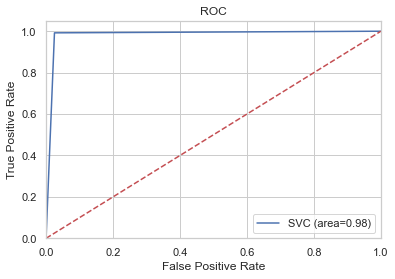

In [719]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
svc_roc_auc=roc_auc_score(y_test, best_model.predict(x_test))
fpr, tpr,thresholds=roc_curve(y_test,best_model.predict(x_test))
plt.figure
plt.plot(fpr,tpr, label="SVC (area=%0.2f)" % svc_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.savefig("SVC_ROC")
plt.show()

In [ ]:
#around 98 percent of the area is covered, so our model is working good

In [720]:
#savingThemodel
import joblib
joblib.dump(best_model,"HR_Attrition.pkl")

['HR_Attrition.pkl']